In [1]:
import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import re
import demoji
from transformers import AutoTokenizer, AutoModelForSequenceClassification


In [2]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("w11wo/indonesian-roberta-base-sentiment-classifier")
model = AutoModelForSequenceClassification.from_pretrained("w11wo/indonesian-roberta-base-sentiment-classifier")



In [3]:
df = pd.read_csv ('data-mbg.csv')
df.head()


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1.918688e+18,Sun May 04 23:59:03 +0000 2025,2,@JackMoon_MikeAK @ciptaanmamah @redread99 @soc...,1.919180e+18,NaN,JackMoon_MikeAK,in,NaN,0,0,0,https://x.com/undefined/status/191917999970738...,9.690300e+07,NaN
1,1.919180e+18,Sun May 04 23:57:16 +0000 2025,2,Kebutuhan gizi anak-anak Papua dapat terpenuhi...,1.919180e+18,https://pbs.twimg.com/media/GqJLn-Ua4AAsTnE.jpg,NaN,in,NaN,0,1,1,https://x.com/undefined/status/191917955150399...,1.356942e+18,NaN
2,1.919176e+18,Sun May 04 23:44:18 +0000 2025,0,Program MBG menjadi langkah strategis untuk me...,1.919176e+18,https://pbs.twimg.com/media/GqJIpRdb0AA2yi4.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/191917628857036...,1.412343e+18,NaN
3,1.918596e+18,Sun May 04 23:37:10 +0000 2025,0,@sseemsms @ongenlus Gabisa program ini dikerja...,1.919174e+18,NaN,sseemsms,in,NaN,0,0,0,https://x.com/undefined/status/191917449187760...,1.703355e+18,NaN
4,1.918906e+18,Sun May 04 23:20:17 +0000 2025,0,@egharap @anakodok2009 @Forum_MBG @barengwarga...,1.919170e+18,NaN,egharap,in,NaN,0,0,0,https://x.com/undefined/status/191917024475023...,4.597496e+09,NaN


In [4]:
teks = df["full_text"]
teks.head()

0    @JackMoon_MikeAK @ciptaanmamah @redread99 @soc...
1    Kebutuhan gizi anak-anak Papua dapat terpenuhi...
2    Program MBG menjadi langkah strategis untuk me...
3    @sseemsms @ongenlus Gabisa program ini dikerja...
4    @egharap @anakodok2009 @Forum_MBG @barengwarga...
Name: full_text, dtype: object

In [9]:
# Load kamus alay 
kamus_df = pd.read_csv("kamus-alay.csv", encoding='latin1') 
kamus = dict(zip(kamus_df['slang'], kamus_df['formal']))

# Fungsi"
def normalisasi(text):
    return ' '.join([kamus.get(kata, kata) for kata in text.split()])

def remove_emoji(text):
    return demoji.replace(text, "")

def bersihkan(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = remove_emoji(text)
    text = re.sub(r"http\S+|www.\S+", "", text)
    text = re.sub(r"@\w+|#\w+", "", text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"[^a-zA-Z0-9\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    text = normalisasi(text)  # ← normalisasi slang 
    return text


In [10]:
teks_bersih = teks.apply(bersihkan)
df["clean_text"] = teks_bersih


In [11]:
teks_bersih.head

<bound method NDFrame.head of 0       mengapai juga mengkritisi terlalu dalam pihak ...
1       kebutuhan gizi anak anak papua dapat terpenuhi...
2       program mbak menjadi langkah strategis untuk m...
3       enggak bisa program ini dikerjain pemerintah p...
4       tampaknya begitu ya tapi sebaiknya kepala bgn ...
                              ...                        
1220    cianjur makin percaya diri konsumsi program mb...
1221    karanganyar yakin masa depan cerah bareng mbak...
1222    tiga lokasi disiapkan menjadi lahan dapur mbak...
1223    enggak ada fendor enggak dibayar kalau telat d...
1224    satu dapur bermasalah tapi ribuan lainnya teta...
Name: full_text, Length: 1225, dtype: object>

In [12]:
###Minimalisir Buzzer
teks_bersih[teks_bersih.duplicated()]


16      bandung semangat dengan kolaborasi bpom progra...
26      bandung terus sukseskan program mbak bpom hadi...
54                                   manfaat program mbak
66      dukung terus sinergi bpom dan puskesmas biar p...
91      presiden tegaskan program makan bergizi gratis...
                              ...                        
1201    dan waktu makan after sholat dhuhur karena jam...
1203    satu masalah utama program mbak prabowo kenapa...
1208    harapan positif tumbuh saat bpom bareng puskes...
1210    dukungan total untuk mbak dari bandung bareng ...
1220    cianjur makin percaya diri konsumsi program mb...
Name: full_text, Length: 217, dtype: object

In [13]:
teks_bersih = teks_bersih.drop_duplicates()


In [14]:
teks_bersih.head()

0    mengapai juga mengkritisi terlalu dalam pihak ...
1    kebutuhan gizi anak anak papua dapat terpenuhi...
2    program mbak menjadi langkah strategis untuk m...
3    enggak bisa program ini dikerjain pemerintah p...
4    tampaknya begitu ya tapi sebaiknya kepala bgn ...
Name: full_text, dtype: object

In [15]:
from transformers import pipeline

# Buat pipeline untuk analisis sentimen
sentiment_analysis = pipeline(
    "text-classification",
    model=model,
    tokenizer=tokenizer
)

# Fungsi untuk mendapatkan sentimen
def predict_sentiment(text):
    result = sentiment_analysis(text)
    return result[0]['label'], result[0]['score']

# Terapkan ke teks yang sudah dibersihkan
df[['sentimen', 'skor']] = df['clean_text'].apply(
    lambda x: pd.Series(predict_sentiment(x) if x.strip() else ('neutral', 0))
)

Device set to use cpu


In [16]:
# Hitung distribusi sentimen
sentimen_distribusi = df['sentimen'].value_counts(normalize=True) * 100
print(sentimen_distribusi)

# Contoh melihat beberapa hasil
print(df[['clean_text', 'sentimen', 'skor']].head(10))

sentimen
positive    44.081633
negative    28.408163
neutral     27.510204
Name: proportion, dtype: float64
                                          clean_text  sentimen      skor
0  mengapai juga mengkritisi terlalu dalam pihak ...  negative  0.998993
1  kebutuhan gizi anak anak papua dapat terpenuhi...   neutral  0.968161
2  program mbak menjadi langkah strategis untuk m...   neutral  0.873316
3  enggak bisa program ini dikerjain pemerintah p...  negative  0.998952
4  tampaknya begitu ya tapi sebaiknya kepala bgn ...  negative  0.991878
5  kayak enggak tau saja typical orang indonesia ...  negative  0.757163
6  bandung makin keren setelah tau program mbak k...  positive  0.999018
7  saat ini enggak usah ada hubungan diplomatikan...   neutral  0.990293
8  kenapa sebelum membuat janji kampamye tidak me...  negative  0.631427
9  prabowo akui program mbak rawan dikorupsi jadi...   neutral  0.992866


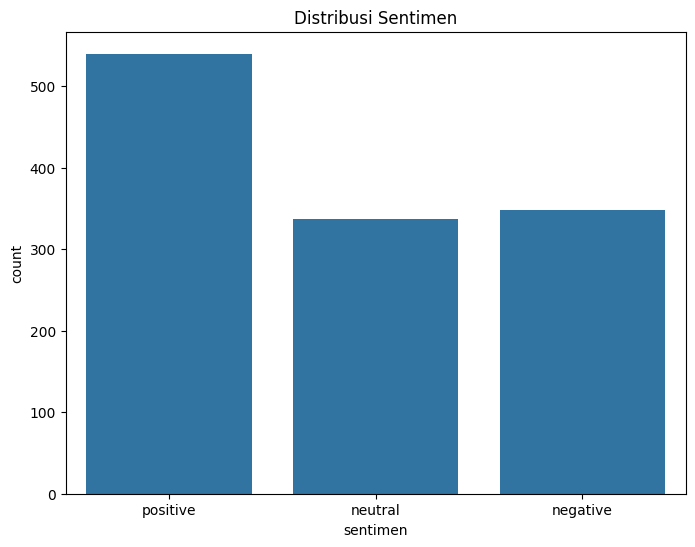

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi sentimen
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sentimen', order=['positive', 'neutral', 'negative'])
plt.title('Distribusi Sentimen')
plt.show()